# Lecture 11 Mapping Shootings
- Name: Vivaan Bhandari
- Division: B
- Roll No: 44

In [1]:
#Setup
import pandas as pd

In [2]:
#Importing the Mass Shooting Data of 2016 into our Notebook
shootings_df = pd.read_csv("Mass-Shooting-Data-2016.csv")
shootings_df

,date,city,state,injured,killed,lat,lng
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728
...,...,...,...,...,...,...,...
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589
321,8-Jan-16,Washington,District of Columbia,4,0,38.894955,-77.036646
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628


In [3]:
#First 10 rows in my dataframe
shootings_df.head(10)

,date,city,state,injured,killed,lat,lng
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728
5,30-Oct-16,Newburgh,New York,5,2,41.503427,-74.010418
6,30-Oct-16,New York (Manhattan),New York,4,0,40.748436,-73.985693
7,30-Oct-16,Capitol Heights,Maryland,4,2,38.885396,-76.915944
8,30-Oct-16,San Antonio,Texas,5,0,29.424600,-98.495140
9,29-Oct-16,Dayton,Ohio,3,1,39.758948,-84.191607


In [4]:
#Average injuries and Average killed by State and City
avg_injuries_killed_df = shootings_df.groupby(["state", "city"]).agg(avg_injuries = ("injured", "mean"),
                                                                    avg_killed = ("killed", "mean"))
avg_injuries_killed_df                                                                                  

avg_injuries  avg_killed
state         city                                         
Alabama       Anniston                      4.0         0.0
              Auburn                        1.0         3.0
              Bessemer                      3.0         1.0
              Bessemer (Brighton)           6.0         1.0
              Birmingham                    4.0         1.0
...                                         ...         ...
Washington    Seattle                       3.0         2.0
              Tacoma                        5.0         0.0
              Woodland                      1.0         3.0
West Virginia Charleston                    3.0         1.0
Wisconsin     Milwaukee                     2.5         1.5

[194 rows x 2 columns]

In [5]:
#Total injuries and total killed by state and city
total_injuries_killed_df = shootings_df.groupby(["state", "city"]).agg(injuries = ("injured", "sum"),
                                                                        killed = ("killed", "sum"))
total_injuries_killed_df

injuries  killed
state         city                                 
Alabama       Anniston                    4       0
              Auburn                      1       3
              Bessemer                    3       1
              Bessemer (Brighton)         6       1
              Birmingham                  4       1
...                                     ...     ...
Washington    Seattle                     3       2
              Tacoma                      5       0
              Woodland                    1       3
West Virginia Charleston                  3       1
Wisconsin     Milwaukee                   5       3

[194 rows x 2 columns]

In [6]:
#Sort by Killed column in Ascending
total_injuries_killed_df.sort_values("killed", ascending=True)

,,injuries,killed
state,city,,
Alabama,Anniston,4,0
New Jersey,Willingboro,4,0
New York,Bronx,4,0
Florida,Miami Gardens,4,0
New York,Brooklyn,24,0
...,...,...,...
Arizona,Glendale,5,8
Ohio,Piketon,0,8
Texas,Houston,31,10


In [7]:
total_injuries_killed_df.sort_values("killed", ascending=False)

injuries  killed
state      city                                  
Florida    Orlando                     77      55
Illinois   Chicago                     87      11
Texas      Houston                     31      10
California Los Angeles                 36       8
Arizona    Glendale                     5       8
...                                   ...     ...
New York   New York (Manhattan)         8       0
           Elmira                       5       0
           Corona (Queens)              4       0
           Brooklyn                    24       0
Alabama    Anniston                     4       0

[194 rows x 2 columns]

# Challenge (5 Points): Top 5 States in United States with the most injuries

In [8]:
injured_states_df = shootings_df.groupby(["state"]).agg(injuries = ("injured", "sum"))
top_five_injured_states_df= injured_states_df.sort_values("injuries", ascending = False).head(5)
top_five_injured_states_df

,injuries
state,
Florida,169
California,155
Illinois,127
Texas,94
New York,57


# 2016 Mass Shootings Report

In [9]:
#Total Injuries
total_injuries = shootings_df.injured.sum()
total_injuries

1311

In [10]:
#Total Killed
total_killed = shootings_df.killed.sum()
total_killed

400

# Create and print a variable that says "In 2016, there were 1311 injuries, and 400 people killed, due to mass-shootings."

In [11]:
report_sentence = "In 2016, there were " + str(total_injuries) + " injures, and " + str(total_killed) + " people killed, due to mass shootings."
report_sentence

'In 2016, there were 1311 injures, and 400 people killed, due to mass shootings.'

# Lecture 12 Starts Here

Z Index

A city is dangerous only if persons involved per incident is greater than 5.

In [28]:
# Creating a column called persons involved in shootings df
shootings_df["persons_involved"] = shootings_df["injured"] + shootings_df["killed"]

#Creating a city dataframe to calculate total persons involved and total incidents per city
city_df = shootings_df.groupby(["state", "city"]).agg(total_persons_involved = ("persons_involved", "sum"),
                                                    total_incidents = ("city", "count"))

# Creating a column to calculate total perons per incident
city_df["persons_involved_per_incident"] = city_df["total_persons_involved"]/city_df["total_incidents"]
                                                                       
# Creating our final Z - Index dataframe which shows only cities which have atleast 5 persons involved per incident
z_index_df = city_df.loc[city_df["persons_involved_per_incident"]>=5].sort_values("persons_involved_per_incident",
                                                                                 ascending = False)
z_index_df

,,total_persons_involved,total_incidents,persons_involved_per_incident
state,city,,,
Florida,Orlando,132,5,26.4
Kansas,Hesston,18,1,18.0
California,Bakersfield,15,1,15.0
Connecticut,Bridgeport,13,1,13.0
Florida,Fort Myers,25,2,12.5
...,...,...,...,...
Alabama,Birmingham,5,1,5.0
Maryland,District Heights (Forestville),5,1,5.0
Michigan,Berrien (county),5,1,5.0


# Challenge(5 Points): Implement the Hoz Index
- Filter for incidents in which there were atleast 1 person killed
- Sort to see cities with the maximum incidence in which there was atleast 1 person killed

In [46]:
atleast_1_killed_df = shootings_df.loc[shootings_df["killed"] >= 1]
atleast_1_killed_df

,date,city,state,injured,killed,lat,lng,perons_involved,persons_involved
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421,4,4
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628,6,6
5,30-Oct-16,Newburgh,New York,5,2,41.503427,-74.010418,7,7
7,30-Oct-16,Capitol Heights,Maryland,4,2,38.885396,-76.915944,6,6
9,29-Oct-16,Dayton,Ohio,3,1,39.758948,-84.191607,4,4
...,...,...,...,...,...,...,...,...,...
319,17-Jan-16,Ware Neck (Gloucester Courthouse),Virginia,3,1,37.402640,-76.458560,4,4
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589,5,5
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421,5,5
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628,4,4


In [47]:
# Sort in descending to see cities with the maximum incidents in which there was atleat 1 person killed
hoz_city_df = atleast_1_killed_df.groupby(["state", "city"]).agg(total_incidents = ("city", "count"))
hoz_city_df.sort_values("total_incidents", ascending = False)

total_incidents
state      city                             
Illinois   Chicago                         8
Texas      Houston                         7
Florida    Miami                           4
California Los Angeles                     4
Florida    Orlando                         4
...                                      ...
Georgia    Jackson                         1
           Dekalb (county)                 1
           Decatur                         1
           Atlanta                         1
Maryland   District Heights                1

[128 rows x 1 columns]

# Kha Index
- Find the average(aka the mean) persons involved per incident
- Lis the cities that exceed the average(aka the mean) persons involved per incident

In [78]:
#Average persons involved per incident (can also use describe)
avg_persons_involved_per_incident = shootings_df.persons_involved.mean()

In [79]:
city_df.loc[city_df["persons_involved_per_incident"] >= avg_persons_involved_per_incident]

total_persons_involved  \
state         city                                               
Alabama       Bessemer (Brighton)                            7   
Arizona       Glendale                                      13   
              Phoenix                                       15   
California    Bakersfield                                   15   
              Compton                                        9   
              Los Angeles                                   44   
Connecticut   Bridgeport                                    13   
Florida       Cape Coral                                     6   
              Fort Myers                                    25   
              Jacksonville                                  11   
              Orlando                                      132   
              Tampa                                         12   
Georgia       Appling                                        6   
              Athens                                         7   
Illinois      Rockford                                       6   
Kansas        Hesston                                       18   
Louisiana     Shreveport                                    12   
Maryland      Bethesda                                       6   
              Capitol Heights                                6   
Massachusetts Chelsea                                        7   
Michigan      Grand Rapids                                   9   
              Kalamazoo                                      8   
Mississippi   Jackson                                        6   
              Pass Christian                                 6   
Missouri      Kansas City                                    6   
New Jersey    Egg Harbor City                                6   
              Trenton                                       11   
New York      Newburgh                                       7   
              Rochester                                      8   
Ohio          Hamilton                                       8   
              Piketon                                        8   
Oklahoma      Wellston                                       6   
Pennsylvania  Pittsburgh (Wilkinsburg)                       8   
Tennessee     Clarksville                                    6   
Texas         Dallas                                        23   
              Edinburg                                       7   
              Fort Worth                                     7   
              Lubbock                                        6   
Virginia      Chesapeake                                     6   
              Roanoke                                       20   

                                        total_incidents  \
state         city                                        
Alabama       Bessemer (Brighton)                     1   
Arizona       Glendale                                2   
              Phoenix                                 2   
California    Bakersfield                             1   
              Compton                                 1   
              Los Angeles                             8   
Connecticut   Bridgeport                              1   
Florida       Cape Coral                              1   
              Fort Myers                              2   
              Jacksonville                            2   
              Orlando                                 5   
              Tampa                                   2   
Georgia       Appling                                 1   
              Athens                                  1   
Illinois      Rockford                                1   
Kansas        Hesston                                 1   
Louisiana     Shreveport                              2   
Maryland      Bethesda                                1   
              Capitol Heights                         1   
Massachusetts Chelsea       

# Data Visualization (Bar Charts)

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make a bar chart that shows me the top 5 cities by killed

In [98]:
bar_chart_df = shootings_df.groupby(["state", "city"]).agg(killed = ("killed", "sum"))
bar_chart_df = bar_chart_df.sort_values("killed",ascending = False).head(5).reset_index()
bar_chart_df

,state,city,killed
0,Florida,Orlando,55
1,Illinois,Chicago,11
2,Texas,Houston,10
3,California,Los Angeles,8
4,Arizona,Glendale,8


<AxesSubplot:xlabel='city', ylabel='killed'>

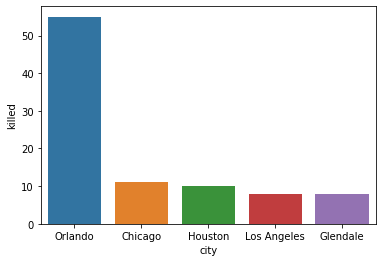

In [99]:
sns.barplot(x= "city", y = "killed", data = bar_chart_df)

# Challenge (3 Points): Make a bar chart that shows the top 5 cities with the most injured.

In [117]:
bar_chart2_df = shootings_df.groupby(["state"]).agg(injured = ("injured", "sum"))
bar_chart2_df = bar_chart2_df.sort_values("injured",ascending = False).head(10).reset_index()
bar_chart2_df

,state,injured
0,Florida,169
1,California,155
2,Illinois,127
3,Texas,94
4,New York,57
5,Georgia,51
6,Alabama,46
7,Tennessee,43
8,Michigan,43
9,Louisiana,41


<AxesSubplot:xlabel='state', ylabel='injured'>

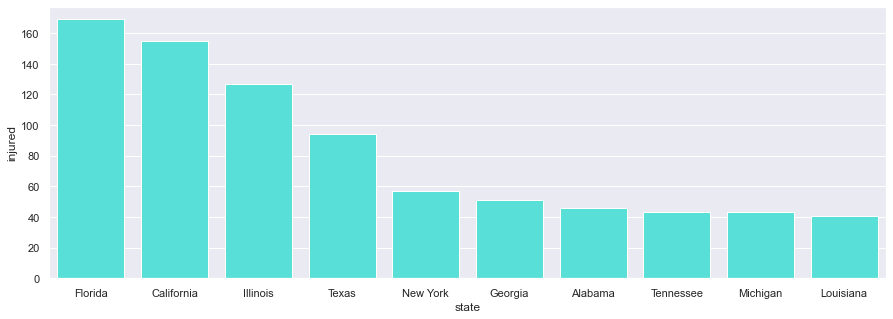

In [119]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x= "state", y = "injured", data = bar_chart2_df, color = "#42f5ec")